Tutorial 4: Planes
==================

We've learnt how to make galaxy objects out of _LightProfile_'s and _MassProfile_'s. Now, we'll use these galaxies to
make a strong-gravitational lens.

For newcomers to lensing, a strong gravitational lens is a system where two (or more) galaxies align perfectly down our
line of sight, such that the foreground _Galaxy_'s mass (represented as _MassProfile_'s) deflects the light (represented
as _LightProfile_'s) of the background source galaxy(s).

When the alignment is just right and the lens is just massive enough, the background source galaxy appears multiple
times. The schematic below shows a crude drawing of such a system, where two light-rays from the source are bending
around the lens galaxy and into the observer (light should bend 'smoothly', but drawing this on a keyboard wasn't
possible - so just pretend the diagonal lines coming from the observer and source are less jagged)


Observer                  Image-Plane               Source-Plane

(z=0, Earth)               (z = 0.5)                (z = 1.0)

      ----------------------------------------------

        /                                              \ <---- This is one of the source's light-rays

       /                      __                       \

  o   /                      /  \                      __

  |  /                      /   \                     /  \

 /\  \                      \   /                     \__/

      \                     \__/                 Source Galaxy (s)

       \                Lens Galaxy(s)                /

         \                                           / <----- And this is its other light-ray

       ------------------------------------------/

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its 
light after it is deflected and lensed by the foreground _Galaxy_'s mass. In this exercise, we'll make a source galaxy 
image whose light has been deflected by a lens galaxy.

In the schematic above, we used the terms 'Image-Plane' and 'Source-Plane'. In lensing speak, a 'plane' is a 
collection of galaxies at the same redshift (that is, parallel to one another down our line-of-sight). Therefore:

- If two or more lens galaxies are at the same redshift in the image-plane, they deflect light in the same way. 
This means we can sum the convergences, potentials and deflection angles of their _MassProfile_'s.

- If two or more source galaxies are at the same redshift in the source-plane, their light is ray-traced in the same 
way. Therefore, when determining their lensed images, we can sum the lensed images of each _Galaxy_'s _LightProfile_'s.

So, lets do it - lets use the 'plane' module in AutoLens to create a strong lensing system like the one pictured above. 
For simplicity, we'll assume 1 lens galaxy and 1 source galaxy.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

As always, we need a _Grid_, where our _Grid_ is the coordinates we 'trace' from the image-plane to the source-plane in 
the lensing configuration above. Our _Grid_ is therefore no longer just a 'grid', but an image-plane _Grid_ representing 
our image-plane coordinates. Thus, lets name as such.

In [2]:
image_plane_grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=1)

Whereas before we called our _Galaxy_'s things like 'galaxy_with_light_profile', lets now refer to them by their role 
in lensing, e.g. 'lens_galaxy' and 'source_galaxy'.

In [115]:
mass_profile = al.mp.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile1 = al.lp.SphericalSersic(
    centre=(0.4, 0.2), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)



source_galaxy = al.Galaxy(redshift=1.0, light_1=light_profile1)

Lets setup our image-plane using a _Plane_ object. This _Plane_ takes the lens galaxy we made above.

In [116]:
image_plane = al.Plane(galaxies=[lens_galaxy])

Just like we did with _Galaxy_'s we can compute quantities from the _Plane_ by passing it a _Grid_.

In [117]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of _Plane_'s _Grid_ pixel 0:")
print(deflections.in_2d[0, 0, 0])
print(deflections.in_2d[0, 0, 0])

print("deflection-angles of _Plane_'s _Grid_ pixel 1:")
print(deflections.in_2d[0, 1, 1])
print(deflections.in_2d[0, 1, 1])

deflection-angles of _Plane_'s _Grid_ pixel 0:
1.1313708498984762
1.1313708498984762
deflection-angles of _Plane_'s _Grid_ pixel 1:
-1.1197679539495438
-1.1197679539495438


_Plane_ plotters exist, which work analogously to _Profile_ plotters and _Galaxy_ plotters.

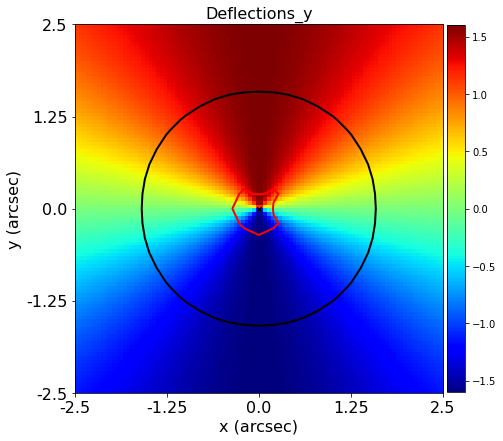

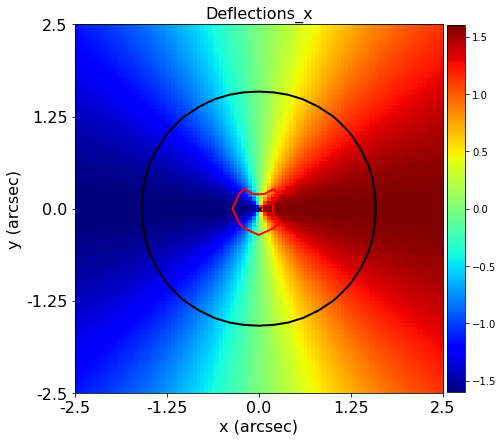

In [118]:
aplt.Plane.deflections_y(plane=image_plane, grid=image_plane_grid)
aplt.Plane.deflections_x(plane=image_plane, grid=image_plane_grid)

Throughout this chapter, we plotted lots of deflection angles. However, if you are not familiar with strong lensing, 
you probably weren't entirely sure what they are actually used for. 

The deflection angles tell us how light is 'lensed' by a lens galaxy. By taking the image-plane coordinates and 
deflection angles, we can subtract the two to determine the source-plane's lensed coordinates, e.g.

source_plane_coordinates = image_plane_coordinates - image_plane_deflection_angles

Therefore, we can use our image_plane to 'trace' its _Grid_ to the source-plane...

In [119]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of _Grid_ pixel 0:")
print(source_plane_grid.in_2d[0, 0, :])
print("Traced source-plane coordinates of _Grid_ pixel 1:")
print(source_plane_grid.in_2d[0, 1, :])

Traced source-plane coordinates of _Grid_ pixel 0:
[ 1.34362915 -1.34362915]
Traced source-plane coordinates of _Grid_ pixel 1:
[ 1.33214405 -1.30523205]


... and use this _Grid_ to setup the source-plane

In [120]:
source_plane = al.Plane(galaxies=[source_galaxy])

Lets inspect our _Grid_'s - I bet our source-plane isn't the boring uniform _Grid_ we plotted in the first tutorial!

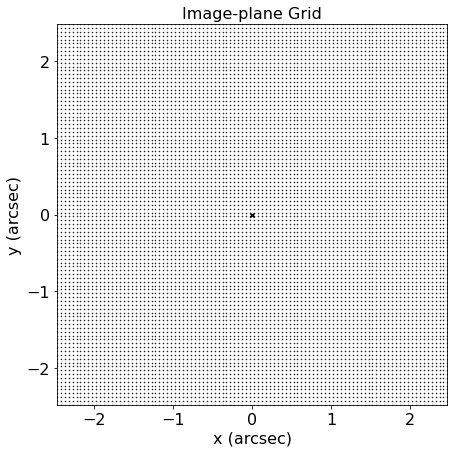

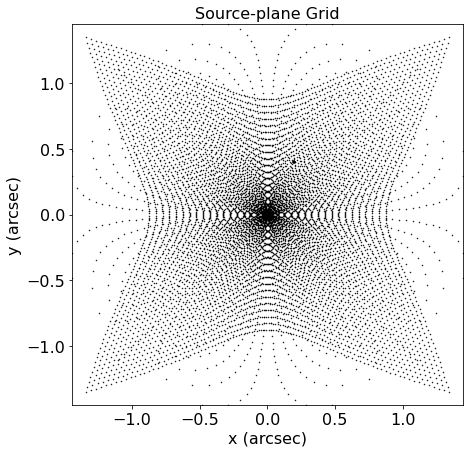

In [121]:
aplt.Plane.plane_grid(
    plane=image_plane,
    grid=image_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Image-plane Grid")),
)

aplt.Plane.plane_grid(
    plane=source_plane,
    grid=source_plane_grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

We can zoom in on the 'centre' of the source-plane (remembering the lens galaxy was centred at (0.1", 0.1")).

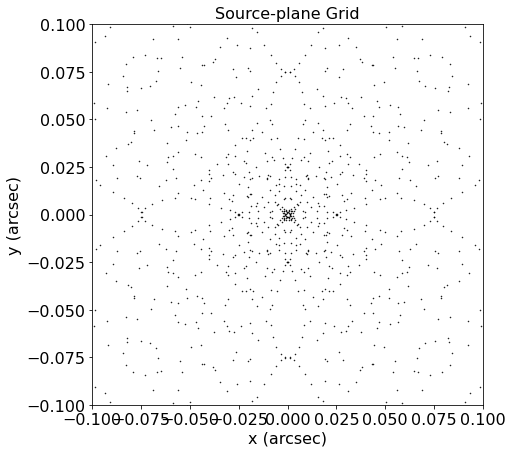

In [122]:
aplt.Plane.plane_grid(
    plane=source_plane,
    grid=source_plane_grid,
    axis_limits=[-0.1, 0.1, -0.1, 0.1],
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source-plane Grid")),
)

We can also plot both _Plane_'s next to one another, and highlight specific points. This means we can see how different 
image pixels map to the source-plane (and visa versa).

(We are inputting the indexes of the _Grid_ into 'indexes' - the first set of indexes go from 0 -> 50, which is the top 
row of the image-grid running from the left - as we said it would!)

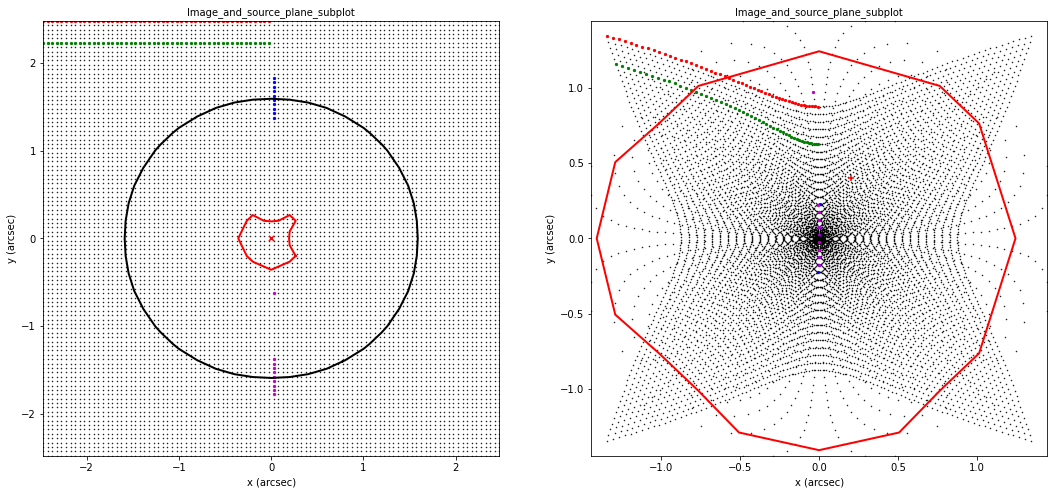

In [123]:
aplt.Plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ],
)

Clearly, the source-plane's _Grid_ is very different to the image-planes! It's not uniform and its certranly not boring!

We can now ask the question - 'what does our source-galaxy look like in the image-plane'? That is, to us, the observer 
on Earth, how does the source-galaxy appear after lensing?. To do this, we simple trace the source-galaxy's light 
'back' from the source-plane grid.

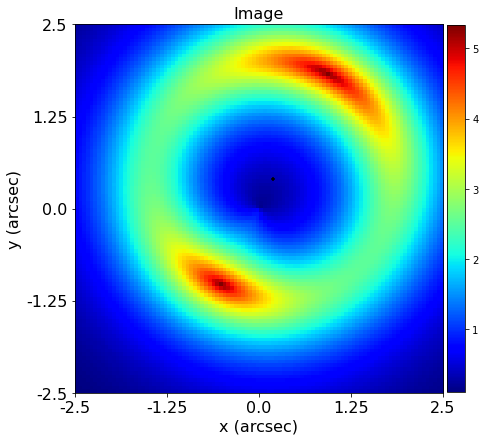

In [124]:
aplt.Plane.image(plane=source_plane, grid=source_plane_grid)

It's a rather spectacular ring of light, but why is it a ring? Well:

- Our lens galaxy was centred at (0.0", 0.0").
- Our source-galaxy was centred at (0.0", 0.0").
- Our lens galaxy had a spherical _MassProfile_.
- Our source-galaxy a spherical _LightProfile_.

Given the perfect symmetry of the system, every path the source's light takes around the lens galaxy is radially 
identical. Thus, nothing else but a ring of light can form!

This is called an 'Einstein Ring' and its radius is called the 'Einstein Radius', which are both named after the man 
who famously used gravitational lensing to prove his theory of general relativity.

Finally, because we know our source-galaxy's _LightProfile_, we can also plot its 'plane-image'. This image is how the 
source intrinsically appears in the source-plane (e.g. without lensing). This is a useful thing to know, because the 
source-s light is highly magnified, meaning astronomers can study it in a lot more detail than would otherwise be 
possible!

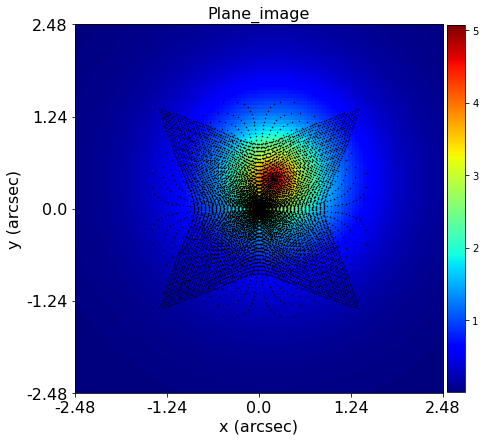

In [125]:
aplt.Plane.plane_image(
    plane=source_plane, grid=source_plane_grid, include=aplt.Include(grid=True)
)

Plotting the _Grid_ over the plane image obscures its appearance, which isn't ideal. We can of course tell PyAutoLens 
not to plot the grid.

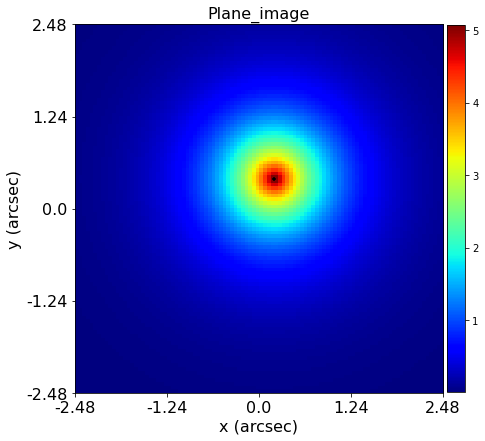

In [126]:
aplt.Plane.plane_image(
    plane=source_plane, grid=source_plane_grid, include=aplt.Include(grid=False)
)

For _MassProfile_'s, you can also plot their 'critical curve' and 'caustics', which for those unfamiliar with lensing 
are defined as follows:

    **Critical Curve**:
    
        Lines of infinite magnification where the _MassProfile_ perfectly 'focuses' light rays. Source light near a 
        critical curve appears much brighter than its true luminosity!

    **Caustic**: 
    
        Given the deflection angles of the _MassProfile_ at the critical curves, the caustic is where the 
        critical curve 'maps' too.
        
You may be surprised that the inner critical curve does not appear symmetric, but instead is a non-circular jagged 
shape. As a result of this, the correspnding caustic in the source plane also appears jaggedy. 
 
This is a numerical issue with the way that PyAutoLens computes the critical curves and caustics - without this issue
both would appear perfect symmetric and smooth! Implementing a more robust calculation of these quantities is on the
PyAutoLens featre list, but for now you'll just have to accept this aspect of the visualization is sub-optimal!

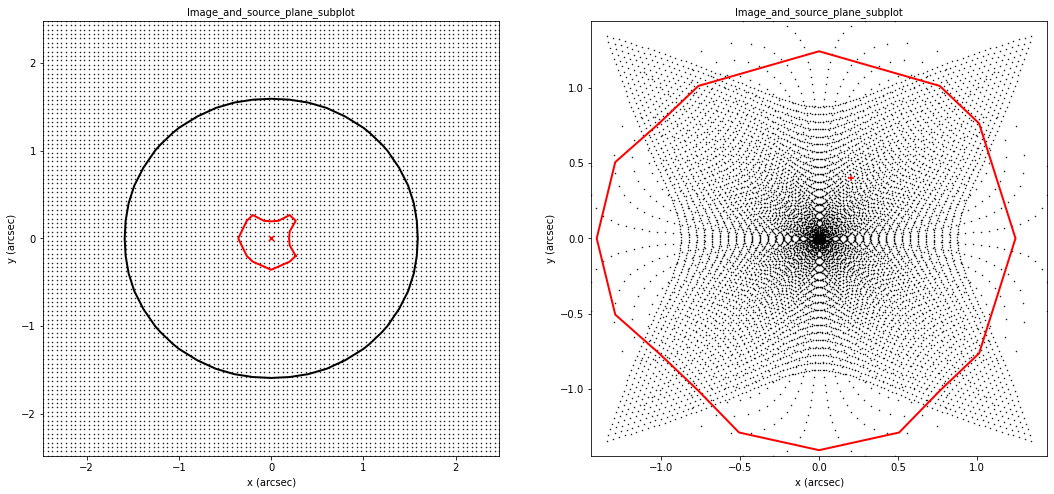

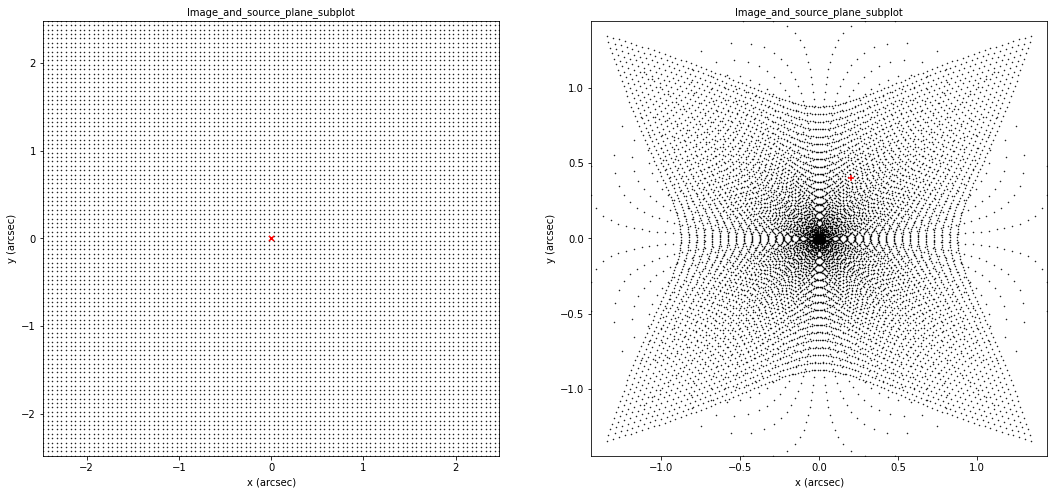

In [127]:
aplt.Plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    include=aplt.Include(critical_curves=True, caustics=True),
)

aplt.Plane.image_and_source_plane_subplot(
    image_plane=image_plane,
    source_plane=source_plane,
    grid=image_plane_grid,
    include=aplt.Include(critical_curves=False, caustics=False),
)